**Verfiy COCO Json file**

In [1]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import os

# Load the COCO JSON file
coco = COCO('car_images_5000/car_annotations_coco.json')

# Get all image IDs
img_ids = coco.getImgIds()

# Loop through each image ID
i =  1
for img_id in img_ids:
    if  i == 5:
        break
    # Load the image
    img = coco.loadImgs(img_id)[0]
    
    # Load annotations for the selected image
    ann_ids = coco.getAnnIds(imgIds=img['id'])
    anns = coco.loadAnns(ann_ids)

    # Construct the image file path
    img_path = os.path.join(r'car_images_5000', img['file_name'])

    # Check if the image file exists
    if not os.path.exists(img_path):
        print(f"Image file not found: {img_path}")
        continue
    
    # Visualize the image and its annotations
    img_data = plt.imread(img_path)
    plt.imshow(img_data)
    coco.showAnns(anns)
    plt.show()
    i+=1


loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: 'car_images_5000/car_annotations_coco.json'

In [2]:
import json

def validate_coco_json(coco_json_path):
    with open(coco_json_path, 'r') as f:
        data = json.load(f)
        
    # Check if essential fields are present
    required_fields = ['images', 'annotations', 'categories']
    for field in required_fields:
        if field not in data:
            print(f"Missing required field: {field}")
            return False
        
    # Check images and annotations
    for img in data['images']:
        if 'id' not in img or 'file_name' not in img:
            print(f"Image missing 'id' or 'file_name': {img}")
            return False
    
    for ann in data['annotations']:
        if 'image_id' not in ann or 'category_id' not in ann or 'bbox' not in ann:
            print(f"Annotation missing 'image_id', 'category_id', or 'bbox': {ann}")
            return False
        
    print("COCO JSON file looks valid.")
    return True

validate_coco_json('test/data.json')


COCO JSON file looks valid.


True

**Verify YOLO annotations**

C:\Users\Tarek\AppData\Local\Temp\ipykernel_7244\2518210686.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10')


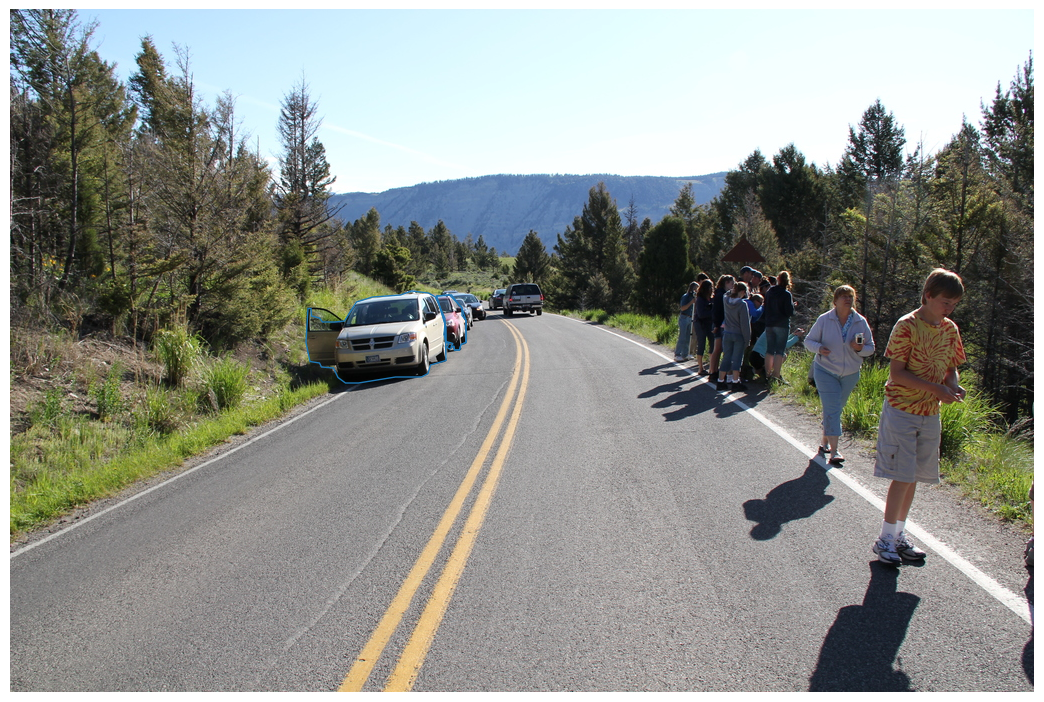

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

def display_image_with_annotations(image_path, annotation_path, output_path='output_image.png', colors=None):
    # Load image using OpenCV and convert it from BGR to RGB color space
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_h, img_w, _ = image.shape
    
    # Set the figure size to match the image size in inches
    fig, ax = plt.subplots(1, figsize=(img_w / 100, img_h / 100), dpi=100)
    ax.imshow(image)
    ax.axis('off')  # Turn off the axes

    # Define a default color map if none is provided
    if colors is None:
        colors = plt.cm.get_cmap('tab10')

    # Open the annotation file and process each line
    with open(annotation_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            category_id = int(parts[0])
            # Choose color based on category ID, looping through color map if more than 10 categories
            color = colors(category_id % 10)
            # Extract normalized polygon coordinates and denormalize them
            polygon = [float(coord) for coord in parts[1:]]
            polygon = [coord * img_w if i % 2 == 0 else coord * img_h for i, coord in enumerate(polygon)]
            # Reshape into (num_points, 2) array
            polygon = [(polygon[i], polygon[i+1]) for i in range(0, len(polygon), 2)]
            # Create a Polygon patch using the denormalized coordinates
            patch = patches.Polygon(polygon, closed=True, edgecolor=color, fill=False)
            # Add the patch to the plot to display the annotated region
            ax.add_patch(patch)

    # Save the image with the annotations
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove padding
    #plt.savefig(output_path, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()  # Display the image with annotations

# Example usage with specified image and annotation paths
image_path = r"C:\Users\Tarek\fiftyone\open-images-v7\train\data\004eee32a983a20c.jpg"
annotation_path = r"Labels\004eee32a983a20c.txt"
output_path = 'trackcar2.png'
display_image_with_annotations(image_path, annotation_path, output_path=output_path)
